## Yanai Analysis

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the data
experiment_file_path = 'experiment-new.csv'
df_experiment = pd.read_csv(experiment_file_path)

In [6]:
# Clean the data
df_experiment.columns = [c.replace(' ', '_') for c in df_experiment.columns]

In [7]:
df_experiment.columns

Index(['1.1_Which_country_are_you_from?', '1.2_Please_choose_your_gender',
       '2._How_old_are_you?',
       '3._How_long_have_you_lived_in_your_home_country?(years)', 'Age',
       'B4._Indian_culture_-_Can_you_estimate_the_importance_of_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Religion_(I._e_critisize_religion)]',
       'A1._Indian_culture_-_Can_you_estimate_the_importance_of_the_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Religion_(I._e_critisize_religion)]',
       'Calc',
       'B4._Indian_culture_-_Can_you_estimate_the_importance_of_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Relationships_between_men_and_a_women(I.e_unmarried_couple)]',
       'A1._Indian_culture_-_Can_you_estimate_the_importance_of_the_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Relationships_between_men_and_a_women(I.e_unmarried_couple)]',
       'Calc2',
       'B4._Indian_culture_-_Can_you_estimate_the_importance_

In [8]:
display(df_experiment.head())

,1.1_Which_country_are_you_from?,1.2_Please_choose_your_gender,2._How_old_are_you?,3._How_long_have_you_lived_in_your_home_country?(years),Age,B4._Indian_culture_-_Can_you_estimate_the_importance_of_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Religion_(I._e_critisize_religion)],A1._Indian_culture_-_Can_you_estimate_the_importance_of_the_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Religion_(I._e_critisize_religion)],Calc,B4._Indian_culture_-_Can_you_estimate_the_importance_of_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Relationships_between_men_and_a_women(I.e_unmarried_couple)],A1._Indian_culture_-_Can_you_estimate_the_importance_of_the_taboos_in_the_Indian_culture_?_Please_rate_the_value_of_each_row_[Relationships_between_men_and_a_women(I.e_unmarried_couple)],...,Score3,1._Is_it_common_to_handshake_women_when_presenting_yourself_in_the_Indian_culture?,2._What_does_this_head_shake_in_the_picture_means?,3._What_is_a_general_manner_in_a_group_conversation?,"4._Eye_contact_–_In_a_meeting_between_a_student_and_a_teacher,_both_keep_permanent_eye_contact._What_does_that_mean_in_Indian_culture?_",5._Communication_–_How_does_an_Indian_converse_with_a_foreign_person?,6._A_supervisor_explains_to_an_Indian_student_an_unclear_topic._Then_he_asks_if_the_topic_is_now_clear?_,7._A_student_wants_to_point_another_student_out._What_is_the_common_way_to_do_that?,You_now_completed_4/5_pages._Please_continue_to_page_5/5,You_now_completed_3/5_pages._Please_continue_to_page_4/5.1
0,Srilanka,Male,27-30,6,30,3,4,1,3,4,...,4 / 7,Shaking hands with women is not a common cult...,To confirm the other person you agree with him...,They will laugh in a friendly way and will wai...,"A short eye contact is possible, a teacher is ...","Indirect communication, they will answer quest...",He will answer the supervisor’s immediate for ...,Point out with your chin since pointing finger...,Continue,Continue
1,India,Female,23-26,24,25,4,4,0,4,4,...,3 / 7,Shaking hands with women is not a common cult...,To tell the other person “lets go”,They do not mind to keep non politically corre...,Eye contact is necessary to maintain a better ...,"Direct communication, people will tell you wha...",Some students may use their body to indicate t...,Point out with your chin since pointing finger...,Continue,Continue
2,Tunesia,Male,over 30,20,32,2,3,1,3,2,...,3 / 7,There are no religious restrictions and in the...,To confirm the other person you agree with him...,People express their opinion after another per...,Eye contact is necessary to maintain a better ...,"Indirect communication, but still a straightfo...",He will answer the supervisor’s immediate for ...,Whistle in the ears the name of the other person,Continue,Continue
3,China,Male,27-30,23,28,4,4,0,5,4,...,3 / 7,There are no religious restrictions and in the...,To confirm the other person you agree with him...,They will laugh in a friendly way and will wai...,Eye contact is necessary to maintain a better ...,"Indirect communication, they will answer quest...",Some students may use their body to indicate t...,Whistle in the ears the name of the other person,Continue,Continue
4,Brasil,Male,over 30,4,38,5,5,0,5,4,...,4 / 7,The society encourage women to handshake in or...,To confirm the other person you agree with him...,People express their opinion after another per...,"A short eye contact is possible, a teacher is ...","Indirect communication, they will answer quest...",Some students may use their body to indicate t...,Point out with your chin since pointing finger...,Continue,Continue


In [9]:
# How many countries answered the survey

countries = df_experiment['1.1_Which_country_are_you_from?']
print("Total number of participants: ", countries.count())
print("\nDifferent nationalities in survey: ")
display(countries.value_counts())


Total number of participants:  61

Different nationalities in survey: 


India          20
Germany        11
Greece          4
Tunesia         3
Denemark        2
Ecuador         2
China           2
Iran            2
Israel          1
Bangladesh      1
Afghanistan     1
Curacao         1
Brasil          1
Syria           1
Brazil          1
Pakistan        1
Bulgaria        1
Albania         1
Srilanka        1
Nederlands      1
Russia          1
Kamerun         1
Ukraine         1
Name: 1.1_Which_country_are_you_from?, dtype: int64

In [10]:
# score above 3 sorted by country

country_based_score = df_experiment[['1.1_Which_country_are_you_from?', 'Score', 'Score3']]
# temp = country_based_score.Score[1]
# cleaning the scores
country_based_score.Score = country_based_score.Score.map(lambda x: int(x[0]))
country_based_score.Score3 = country_based_score.Score3.map(lambda x: int(x[0]))
country_based_score_greaterthan3 = country_based_score.loc[(country_based_score['Score'] > 3) | (country_based_score['Score3'] > 3)]
countries_count_score = country_based_score_greaterthan3['1.1_Which_country_are_you_from?']
countries_count_score.value_counts()

/home/maddy/anaconda3/envs/basics/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Germany       8
India         4
Denemark      2
Greece        2
China         2
Iran          2
Nederlands    1
Ecuador       1
Russia        1
Albania       1
Brazil        1
Bulgaria      1
Brasil        1
Tunesia       1
Curacao       1
Srilanka      1
Ukraine       1
Name: 1.1_Which_country_are_you_from?, dtype: int64

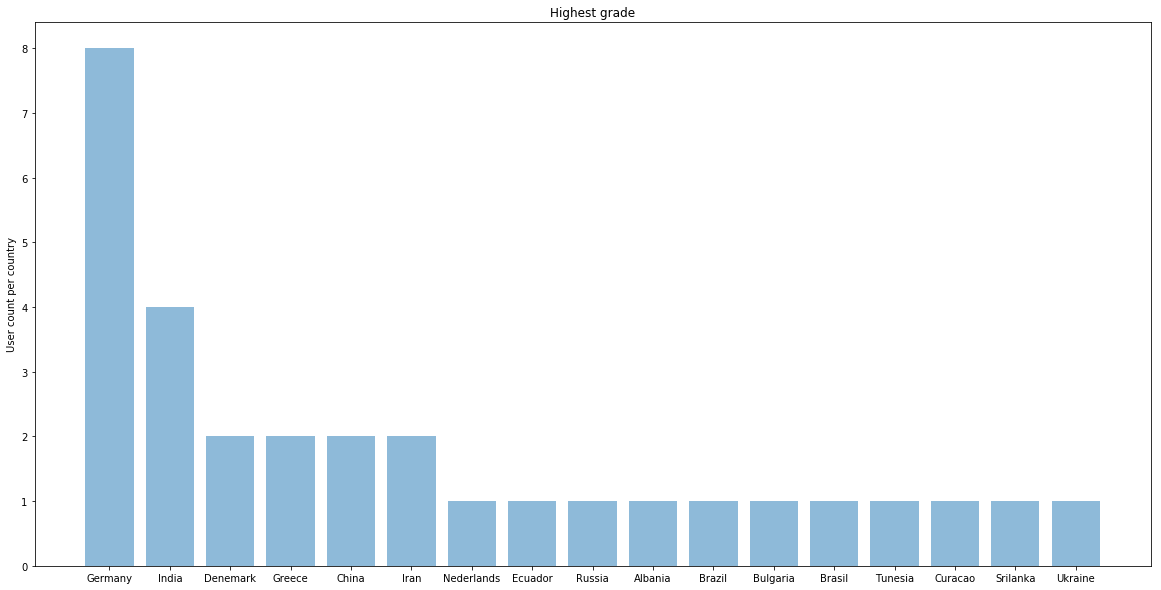

In [11]:
objects = countries_count_score.value_counts().index
y_pos = np.arange(len(objects))
performance = countries_count_score.value_counts()
 
plt.figure(figsize=(20,10))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('User count per country')
plt.title('Highest grade')
plt.savefig('highest-grade-country.png')
plt.show()


In [12]:
# Score above 3 sorted by gender

gender_based_score = df_experiment[['1.2_Please_choose_your_gender', 'Score', 'Score3']]
total_males = gender_based_score.loc[gender_based_score['1.2_Please_choose_your_gender'] == "Male"]
total_males = total_males.count()
total_females = gender_based_score.loc[gender_based_score['1.2_Please_choose_your_gender'] == "Female"]
total_females = total_females.count()
gender_based_score.Score = gender_based_score.Score.map(lambda x: int(x[0]))
gender_based_score.Score3 = gender_based_score.Score3.map(lambda x: int(x[0]))
gender_based_score_greaterthan3 = gender_based_score.loc[(gender_based_score['Score'] > 3) | (gender_based_score['Score3'] > 3)]
gender_count_score = gender_based_score_greaterthan3['1.2_Please_choose_your_gender']
print("Total number of people sorted by Gender: \n Males %d Females %d" %(total_males[1], total_females[1]) )
print("Score above 3 sorted by Gender:\n", gender_count_score.value_counts())

calculate_percentage_males = (26/total_males[1]) * 100
calculate_percentage_females = (5/total_females[1]) * 100
print("Percentage Males: %d%% Females: %d%%" %(calculate_percentage_males, calculate_percentage_females))

Total number of people sorted by Gender: 
 Males 50 Females 11
Score above 3 sorted by Gender:
 Male      26
Female     5
Name: 1.2_Please_choose_your_gender, dtype: int64
Percentage Males: 52% Females: 45%


/home/maddy/anaconda3/envs/basics/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


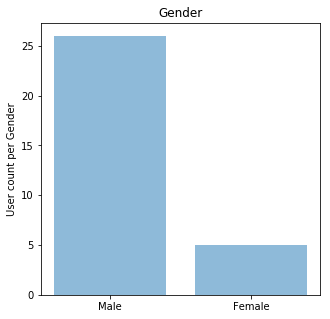

In [13]:
objects = ('Male', 'Female')
y_pos = np.arange(len(objects))
performance = [26, 5]
 
plt.figure(figsize=(5,5))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('User count per Gender')
plt.title('Gender')
plt.savefig('highest-grade-gender.png')
plt.show()

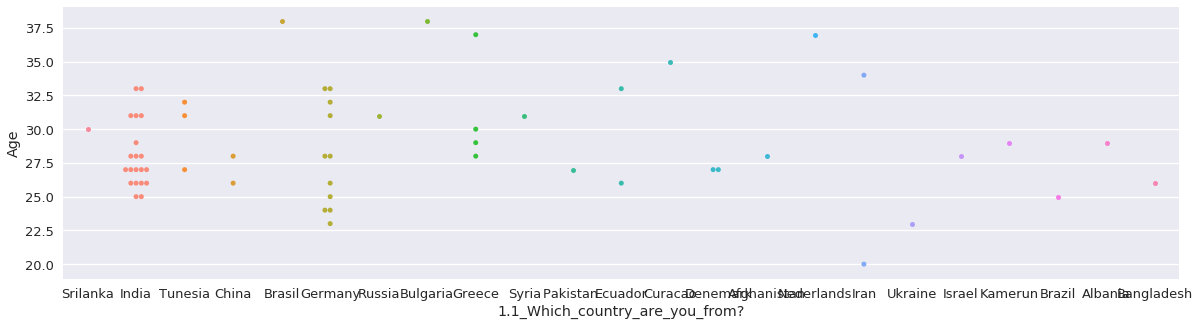

In [20]:
sns.set( context='talk', rc={'figure.figsize':(20, 5)})
sns.swarmplot('1.1_Which_country_are_you_from?', 'Age', data=df_experiment)

In [15]:
BF, Score(BY)
check how BF and Score relate to each other

SyntaxError: invalid syntax (<ipython-input-15-d152a33dc18f>, line 2)

In [ ]:
separate India from dataframe
compare calc values for them